In [167]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline

In [168]:
df = pd.read_csv('outbreaks.csv')

In [169]:
df = df[df['Species'].notnull()]

In [170]:
species_set = df['Species'].str.lower().str.replace(';',',').str.split(',').map(lambda x:[i.strip() for i in x])

In [171]:
df['clean species'] = species_set

In [172]:
df['primary species'] = df['clean species'].apply(lambda x: x[0])

In [173]:
i = df[df['primary species'] == 'norovirus genogroup i']['Illnesses'].sum()
ii = df[df['primary species'] == 'norovirus genogroup ii']['Illnesses'].sum()
u = df[df['primary species'] == 'norovirus unknown']['Illnesses'].sum()

In [174]:
norovirus_total = i + ii + u
norovirus_total

133710

In [175]:
illness_total = df['Illnesses'].sum()
illness_total

295696

In [207]:
np.mean(a)

0.5799634241564953

In [210]:
np.mean(b)

0.4521873816351929

In [176]:
winter = ['December', 'January', 'February', 'March']

In [177]:
df12 = df[df['Month'] == 'December']
df12['Winter'] = True

/home/jackdougherty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [178]:
df1 = df[df['Month'] == 'January']
df1['Winter'] = True

/home/jackdougherty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [179]:
df2 = df[df['Month'] == 'February']
df2['Winter'] = True

/home/jackdougherty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [180]:
df3 = df[df['Month'] == 'March']
df3['Winter'] = True

/home/jackdougherty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [181]:
dfw = pd.concat([df12,df1,df2,df3])

In [182]:
i = dfw[dfw['primary species'] == 'norovirus genogroup i']['Illnesses'].sum()
ii = dfw[dfw['primary species'] == 'norovirus genogroup ii']['Illnesses'].sum()
u = dfw[dfw['primary species'] == 'norovirus unknown']['Illnesses'].sum()

In [183]:
norovirus_winter = i + ii + u
norovirus_winter

56449

In [184]:
illness_winter = dfw['Illnesses'].sum()
illness_winter

97332

Power_divergenceResult(statistic=0.03610608722287927, pvalue=nan)

In [212]:
a = [1] * norovirus_winter + [0] * (illness_winter - norovirus_winter)

In [213]:
b = [1] * norovirus_total + [0] * (illness_total - norovirus_total)

In [214]:
len(a)

97332

In [215]:
len(b)

295696

In [216]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=69.61543674584104, pvalue=0.0)

In [226]:
norovirus_not_winter = norovirus_total - norovirus_winter

In [227]:
not_norovirus_total = illness_total - norovirus_total

In [228]:
not_norovirus_winter = illness_winter - norovirus_winter

In [229]:
not_norovirus_not_winter = not_norovirus_total - not_norovirus_winter

In [230]:
#beta

In [233]:
full_year_a = norovirus_total
full_year_b = total_other = illness_total - norovirus_total

In [234]:
full_year = stats.beta(full_year_a, full_year_b)

In [239]:
winter_a = norovirus_winter
winter_b = winter_other = illness_winter - norovirus_winter

In [241]:
winter = stats.beta(winter_a, winter_b)

In [245]:
non_winter_a = norovirus_total - norovirus_winter
non_winter_b = total_other - winter_other
non_winter = stats.beta(non_winter_a, non_winter_b)

In [246]:
x = np.linspace(0,1,1001)

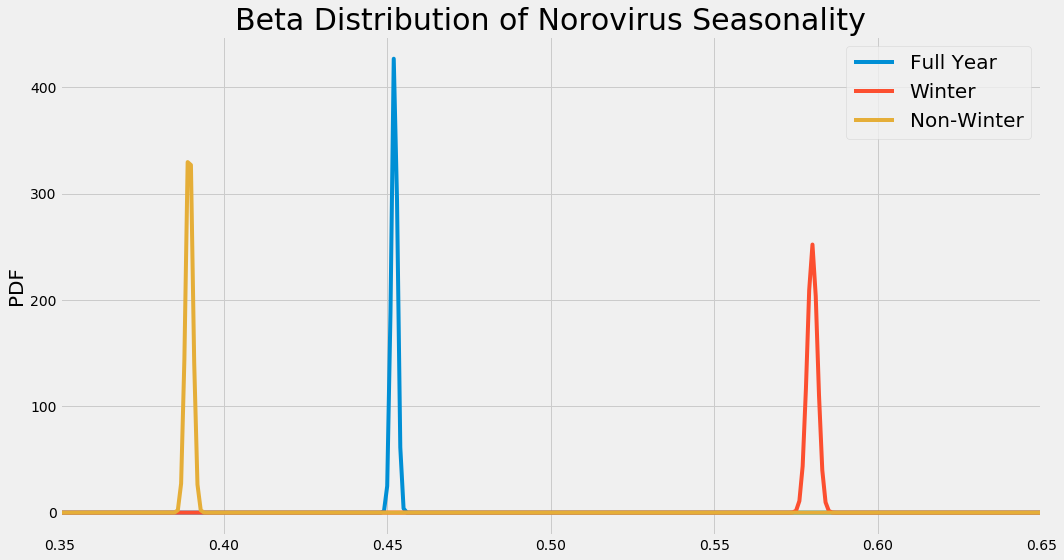

In [273]:
fig,ax = plt.subplots(figsize=(15,8))
ax.plot(x, full_year.pdf(x), label='Full Year')
ax.plot(x, winter.pdf(x), label='Winter')
ax.plot(x, non_winter.pdf(x), label='Non-Winter')
ax.set_ylabel('PDF', size=20)
ax.set_title('Beta Distribution of Norovirus Seasonality', size=30)
plt.xlim(0.35,0.65)
plt.legend(fontsize=20)
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.savefig('figures/norovirus_winter');

In [118]:
df = df.groupby(['Year', 'State']).sum()['Illnesses']

In [119]:
df = df.reset_index()

In [120]:
df.drop(df[df['State'] == 'Guam'].index, inplace=True)

In [121]:
df.drop(df[df['State'] == 'Republic of Palau'].index, inplace=True)

In [122]:
df.drop(df[df['State'] == 'Multistate'].index, inplace=True)

In [123]:
df.drop(df[df['Year'] == 1998].index, inplace=True)

In [124]:
df.drop(df[df['Year'] == 1999].index, inplace=True)

In [125]:
df[df['State'] == 'Maine']

,Year,State,Illnesses
115,2000,Maine,55
163,2001,Maine,214
213,2002,Maine,126
263,2003,Maine,82
312,2004,Maine,44
359,2005,Maine,278
409,2006,Maine,388
459,2007,Maine,2590
509,2008,Maine,730
558,2009,Maine,50


In [126]:
#Third step, make a skeleton dataframe on which to concat my data, so that I can then 
#iterate over segments of data that will have uniform lenghths

In [127]:
states = sorted(df['State'].unique())

In [128]:
len(states)

52

In [129]:
year_list = []
year = 2000
for j in range(2000,2016):
    for i in range(len(states)):
        year_list.append(year)
    year +=1

In [130]:
state_list = []
for i in range(2000,2016):
    for state in states:
        state_list.append(state)

In [131]:
len(state_list)

832

In [132]:
len(year_list)

832

In [133]:
#Fifth step: left merge my data onto skeleton

In [134]:
left = pd.DataFrame(data=[year_list,state_list])

In [135]:
left.shape

(2, 832)

In [136]:
left = left.T

In [137]:
left.shape

(832, 2)

In [138]:
left

,0,1
0,2000,Alabama
1,2000,Alaska
2,2000,Arizona
3,2000,Arkansas
4,2000,California
...,...,...
827,2015,Washington
828,2015,Washington DC
829,2015,West Virginia
830,2015,Wisconsin


In [139]:
left.rename(columns = {0:'Year', 1:'State'}, inplace=True)

In [140]:
df = left.merge(df, how='left', on=['Year', 'State'])

In [141]:
df[df['State'] == 'Maine']

,Year,State,Illnesses
18,2000,Maine,55.0
70,2001,Maine,214.0
122,2002,Maine,126.0
174,2003,Maine,82.0
226,2004,Maine,44.0
278,2005,Maine,278.0
330,2006,Maine,388.0
382,2007,Maine,2590.0
434,2008,Maine,730.0
486,2009,Maine,50.0


In [142]:
#Sixth: add population data and normalize

In [143]:
df['Population'] = pd.DataFrame(pop)

In [144]:
df['Illnesses / Population'] = df['Illnesses'] / df['Population']

In [145]:
df = df.fillna(0)

In [146]:
#Finally, graphs

In [147]:
y_list = []
for state in states:
    y_list.append(df[df['State'] == state]['Illnesses / Population'])

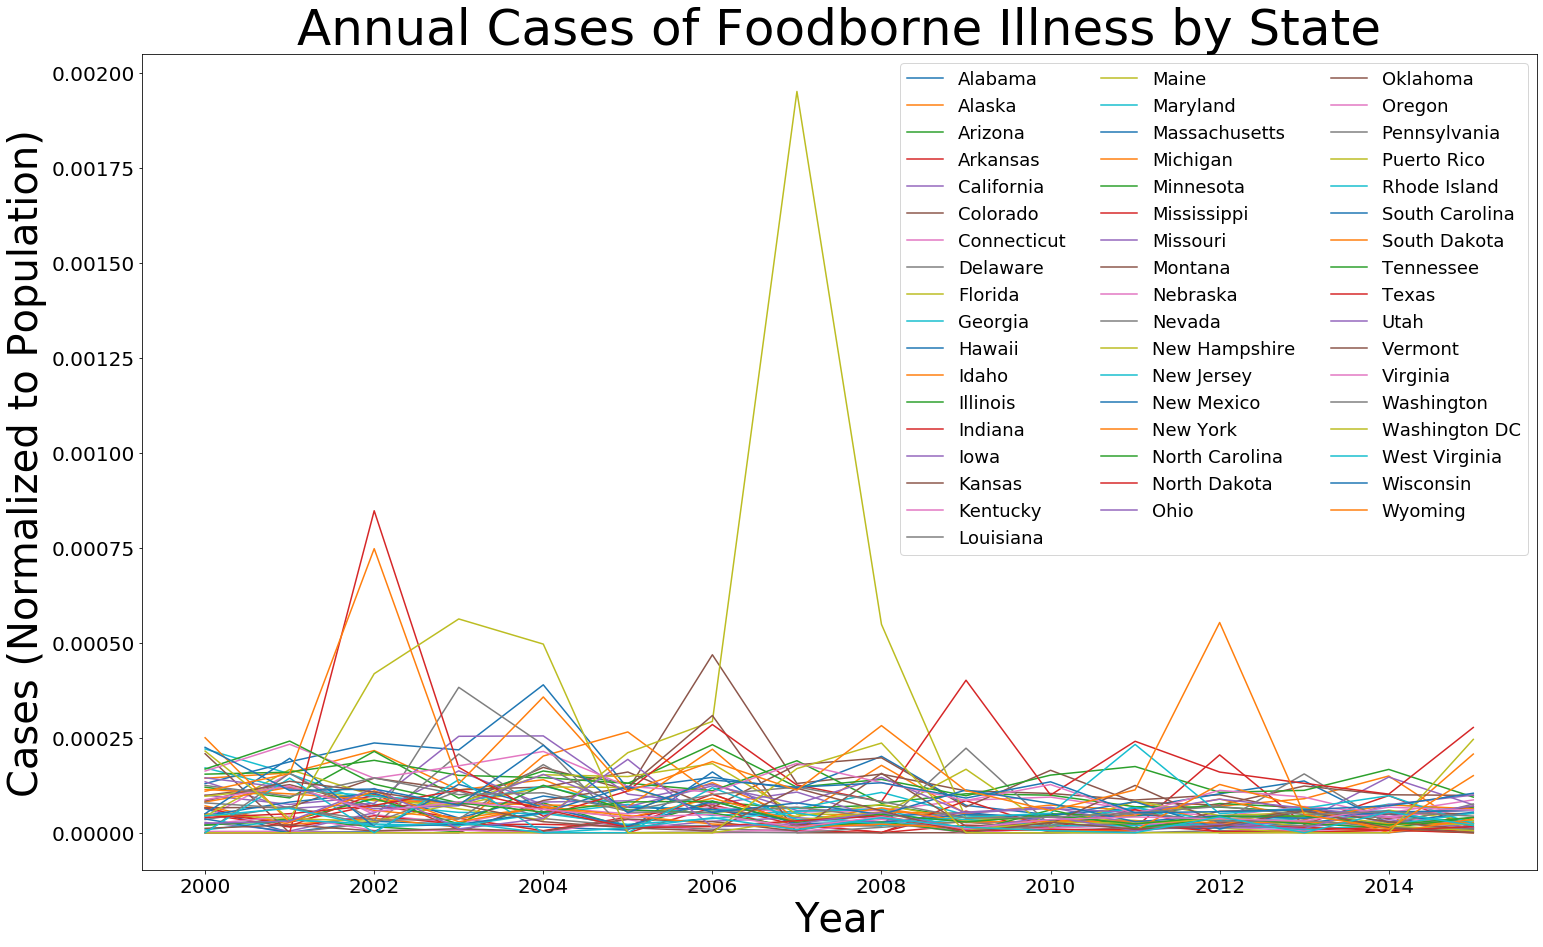

In [163]:
fig,ax=plt.subplots(figsize=(25,15))
for i in range(len(states)):
    ax.plot(range(2000,2016), y_list[i])
ax.set_xlabel('Year', size=40)
ax.set_ylabel('Cases (Normalized to Population)', size=40)
ax.set_title('Annual Cases of Foodborne Illness by State', size=50)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout
plt.legend(states, ncol=3, fontsize=18)
plt.savefig('figures/annual_states');

In [149]:
df[df['Illnesses / Population'] > 0.0004].sort_values(by = 'Illnesses / Population', ascending=False)

,Year,State,Illnesses,Population,Illnesses / Population
382,2007,Maine,2590.0,1327040,0.001952
137,2002,North Dakota,541.0,638168,0.000848
155,2002,Wyoming,374.0,500017,0.000748
204,2003,Washington DC,320.0,568502,0.000563
675,2012,Wyoming,319.0,576305,0.000554
434,2008,Maine,730.0,1330509,0.000549
256,2004,Washington DC,282.0,567754,0.000497
317,2006,Colorado,2212.0,4720423,0.000469
152,2002,Washington DC,240.0,573158,0.000419
501,2009,North Dakota,267.0,664968,0.000402
